## Importing required libraries
  

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

## Loading Dataframe

In [269]:
df=pd.read_csv('anxiety_data.csv')

In [270]:
df.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI10,education,urban,gender,age,religion,race,married,familysize,anxiety_label
0,3,3,3,2,4,3,3,3,3,3,...,1,2,3,2,16,12,10,1,2,Extremely Severe
1,1,3,3,3,3,1,1,1,2,4,...,5,2,3,2,16,7,70,1,4,Extremely Severe
2,0,1,1,0,2,1,0,2,1,1,...,2,2,3,2,17,4,60,1,3,Mild
3,3,1,4,3,2,1,2,1,1,1,...,1,1,3,2,13,4,70,1,5,Extremely Severe
4,2,4,4,4,4,4,4,4,4,4,...,3,3,2,2,19,10,10,1,4,Extremely Severe


## Checking NULL values

In [271]:
df.isna().sum()

Q2A              0
Q4A              0
Q7A              0
Q9A              0
Q15A             0
Q19A             0
Q20A             0
Q23A             0
Q25A             0
Q28A             0
Q30A             0
Q36A             0
Q40A             0
Q41A             0
TIPI1            0
TIPI2            0
TIPI3            0
TIPI4            0
TIPI5            0
TIPI6            0
TIPI7            0
TIPI8            0
TIPI9            0
TIPI10           0
education        0
urban            0
gender           0
age              0
religion         0
race             0
married          0
familysize       0
anxiety_label    0
dtype: int64

## Droping unwanted columns

In [272]:
unwanted=['urban','gender','education','religion','married','familysize','race']
df.drop(unwanted,axis='columns',inplace=True)

In [273]:
df.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age,anxiety_label
0,3,3,3,2,4,3,3,3,3,3,...,7,7,7,7,7,5,1,1,16,Extremely Severe
1,1,3,3,3,3,1,1,1,2,4,...,4,7,5,4,7,7,1,5,16,Extremely Severe
2,0,1,1,0,2,1,0,2,1,1,...,2,2,5,6,5,5,3,2,17,Mild
3,3,1,4,3,2,1,2,1,1,1,...,7,4,6,4,6,1,6,1,13,Extremely Severe
4,2,4,4,4,4,4,4,4,4,4,...,3,6,5,5,5,6,3,3,19,Extremely Severe


## Encoding Categorical Data


In [274]:
label={'Normal':0,
       'Mild':1,
      'Moderate':2,
      'Severe':3,
      'Extremely Severe':4}

In [275]:
df.replace({'anxiety_label':label},inplace=True)

In [276]:
df.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age,anxiety_label
0,3,3,3,2,4,3,3,3,3,3,...,7,7,7,7,7,5,1,1,16,4
1,1,3,3,3,3,1,1,1,2,4,...,4,7,5,4,7,7,1,5,16,4
2,0,1,1,0,2,1,0,2,1,1,...,2,2,5,6,5,5,3,2,17,1
3,3,1,4,3,2,1,2,1,1,1,...,7,4,6,4,6,1,6,1,13,4
4,2,4,4,4,4,4,4,4,4,4,...,3,6,5,5,5,6,3,3,19,4


## Selecting Target Variable

In [277]:
target=df.anxiety_label

In [278]:
df.drop('anxiety_label',axis='columns',inplace=True)

In [279]:
df.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age
0,3,3,3,2,4,3,3,3,3,3,...,5,7,7,7,7,7,5,1,1,16
1,1,3,3,3,3,1,1,1,2,4,...,5,4,7,5,4,7,7,1,5,16
2,0,1,1,0,2,1,0,2,1,1,...,5,2,2,5,6,5,5,3,2,17
3,3,1,4,3,2,1,2,1,1,1,...,1,7,4,6,4,6,1,6,1,13
4,2,4,4,4,4,4,4,4,4,4,...,5,3,6,5,5,5,6,3,3,19


## Using K Fold Cross Validation

In [280]:
def score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [282]:
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=4)

In [283]:
decisionTreeScore=[]
logisticRegressionScore=[]
svcScore=[]
randomForestScore=[]
naiveBayesScore=[]
KNNScore=[]

In [284]:
df_arr=df.to_numpy()

In [285]:
target_arr=target.to_numpy()

In [286]:
for train_index,test_index in fold.split(df_arr,target_arr):
    X_train,X_test,y_train,y_test=df_arr[train_index],df_arr[test_index],target_arr[train_index],target_arr[test_index]
    decisionTreeScore.append(score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    logisticRegressionScore.append(score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test))
    svcScore.append(score(SVC(gamma='auto'),X_train,X_test,y_train,y_test))
    randomForestScore.append(score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))
    naiveBayesScore.append(score(MultinomialNB(),X_train,X_test,y_train,y_test))
    KNNScore.append(score(KNeighborsClassifier(),X_train,X_test,y_train,y_test))

### Decision Tree Classificasion Score

In [287]:
decisionTreeScore

[0.795152855993564, 0.792135961383749, 0.7997787610619469, 0.8002614904958262]

In [288]:
mean(decisionTreeScore)

0.7968322672337715

### Logistic Regression Score

In [289]:
logisticRegressionScore

[0.8107401448109413,
 0.8083266291230893,
 0.8072204344328238,
 0.8067987528914814]

In [290]:
mean(logisticRegressionScore)

0.8082714903145839

### Support Vector Machine(SVM) Score

In [291]:
svcScore

[0.9269911504424779,
 0.9293041029766693,
 0.9345333869670153,
 0.9259780750276576]

In [292]:
mean(svcScore)

0.9292016788534551

### Random Forest Classification Score

In [293]:
randomForestScore

[0.8926991150442478,
 0.8982300884955752,
 0.9024537409493162,
 0.9006336115860404]

In [294]:
mean(randomForestScore)

0.8985041390187949

### Naive Bayes Classification Score

In [295]:
naiveBayesScore

[0.7277755430410298,
 0.7301890587288817,
 0.7469831053901851,
 0.7355928794126522]

In [296]:
mean(naiveBayesScore)

0.7351351466431872

### KNN Score

In [297]:
KNNScore

[0.75, 0.7566371681415929, 0.7607602574416734, 0.7505782962888464]

In [298]:
mean(KNNScore)

0.7544939304680282

#### We found that SVM score is greater than other classificaton techniques.So now we create our model with SVC classifier.

In [299]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.4)

In [300]:
model=SVC()

In [301]:
model.fit(X_train,y_train)

SVC()

In [302]:
model.score(X_test,y_test)

0.967316153362665

In [303]:
pred=model.predict(X_test)

## Calculating Metrics.

### 1.Confusion Matrix

In [304]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,pred)

Text(60.0, 0.5, 'truth')

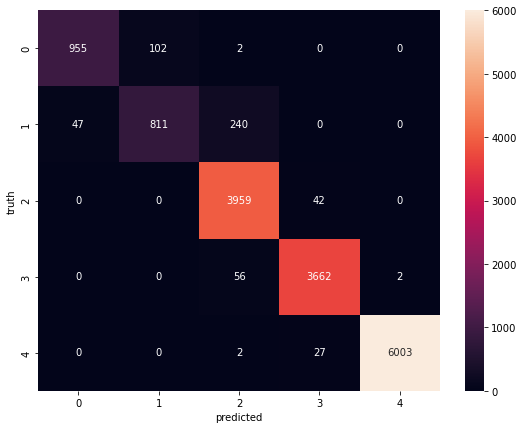

In [305]:
import seaborn as sn
plt.figure(figsize=(9,7))
sn.heatmap(cf,annot=True,fmt=".0f")
plt.xlabel('predicted')
plt.ylabel('truth')

### 2.Precision

In [306]:
from sklearn.metrics import precision_score

In [307]:
y_test_arr=y_test.to_numpy()

In [314]:
precision_score(y_test_arr,pred,pos_label=1,average='macro')

0.9504216758536185

### 3.Recall

In [308]:
from sklearn.metrics import recall_score

In [315]:
recall_score(y_test,pred,pos_label=1,average='macro')

0.921902668890428